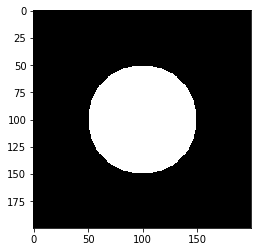

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def distancia(a1, b1, a2, b2):
    return np.sqrt((a1-a2)**2+(b1-b2)**2)

qtdeLinhas = 200
qtdeColunas = 200


W = np.zeros((qtdeLinhas,qtdeColunas))

centro = [100,100]
raio = 50

for i in range(qtdeLinhas):
    for j in range(qtdeColunas):
        if(distancia(i,j,centro[0],centro[1]) < raio):
            W[i,j] = 255

    
plt.gray()
plt.imshow(W)


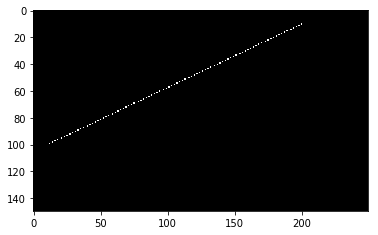

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


qtdeLinhas = 150
qtdeColunas = 250


W = np.zeros((qtdeLinhas,qtdeColunas), dtype=int)

x_inicial = 100
y_inicial = 10
x_final = 10
y_final = 200

coef = (y_final-y_inicial)/(x_final-x_inicial)

for i in range(x2, x1):
    j = round(y1+a*(i-x1))
    W[i,j] = 255

    
plt.gray()
plt.imshow(W)

In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


qtdeLinhas = 150
qtdeColunas = 250


W = np.zeros((qtdeLinhas,qtdeColunas), dtype=int)

x_inicial = 100
y_inicial = 10
x_final = 10
y_final = 200


x = x_inicial
y = y_inicial

while(x != x_final and y != y_final):
    
    d = x_final - x
    
    if(d < 0):
        x = x-1
        y = y+1
    else:
        y = y + 1
        
    W[x,y] = 255    

    
plt.gray()
plt.imshow(W)


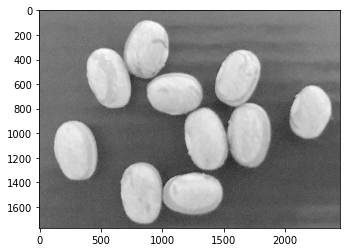

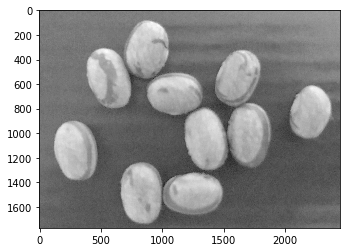

In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('feijao.jpg')

qtdeLinhas, qtdeColunas, c = img.shape

B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]

W = np.zeros((qtdeLinhas, qtdeColunas), dtype=int) #criando uma imagem toda preta (todos os pixels com valores = 0)


for i in range(qtdeLinhas):
    for j in range(qtdeColunas):
        if(G[i,j] > R[i,j] and G[i,j] > B[i,j]):
            W[i,j] = 255
        

plt.gray()
plt.imshow(W)
plt.show()
plt.imshow(R)
plt.show()
plt.imshow(G)
plt.show()
plt.imshow(B)

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('feijao.jpg')

qtdeLinhas, qtdeColunas, c = img.shape

#reduzir a imagem pela metade
linha = round(qtdeLinhas/2.0)
coluna = round(qtdeColunas/2.0)


W = np.zeros((linha, coluna, 3), dtype=int) #criando uma imagem toda preta (todos os pixels com valores = 0) com metade da imagem no tamanho original


for i in range(linha):
    for j in range(coluna):
        W[i,j,:] = img[i*2,j*2,::-1]
        


plt.imshow(W)

In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def reduzir_imagem(a,n):
    return a[::n,::n]


img = cv2.imread('lena.jpg')

print(img.shape)

img = reduzir_imagem(img, 5)

print(img.shape)

plt.imshow(img[:,:,::-1])


(400, 390, 3)
(80, 78, 3)


(400, 390, 3)
(800, 780, 3)


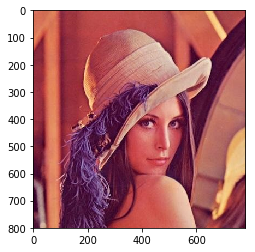

In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def aumentar_imagem(a,n):
    return np.repeat((np.repeat(a,n,axis=0)),n,axis=1)


img = cv2.imread('lena.jpg')

print(img.shape)

img = aumentar_imagem(img, 2)

print(img.shape)

plt.imshow(img[:,:,::-1])

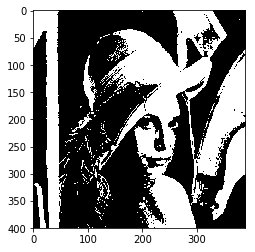

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def nova_cor(x):
    if(x > 125):
        return 255
    else:
        return 0


img = cv2.imread('lena.jpg')

qtdeLinhas, qtdeColunas, c = img.shape

B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]

Gray = B/3 + G/3 + R/3 #convertendo imagem colorida em nível de cinza (fazendo a média do R, G e B)

W = np.zeros((qtdeLinhas, qtdeColunas)) #criando uma imagem toda preta (todos os pixels com valores = 0)


for i in range(qtdeLinhas):
    for j in range(qtdeColunas):
        W[i,j] = nova_cor(Gray[i,j])
        

plt.gray()
plt.imshow(W)        


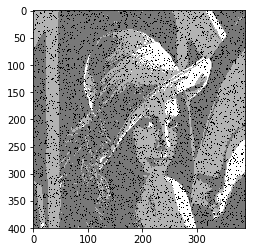

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random


def nova_cor(x):
    if(x > 125):
        return 255
    else:
        return 0


img = cv2.imread('lena.jpg')

qtdeLinhas, qtdeColunas, c = img.shape

B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]

Gray = B/3 + G/3 + R/3 #convertendo imagem colorida em nível de cinza (fazendo a média do R, G e B)

W = np.zeros((qtdeLinhas, qtdeColunas)) #criando uma imagem toda preta (todos os pixels com valores = 0)


for i in range(qtdeLinhas):
    for j in range(qtdeColunas):
        if(random.randint(0,9) < 9):
            W[i,j] = nova_cor(Gray[i,j])
        

plt.gray()
plt.imshow(W)        


In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def nova_cor(x):
    if(x < 30):
        return 60
    elif (x < 120):
        return 120
    elif (x < 180):
        return 180
    return 255


img = cv2.imread('lena.jpg')

qtdeLinhas, qtdeColunas, c = img.shape

B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]

Gray = B/3 + G/3 + R/3 #convertendo imagem colorida em nível de cinza (fazendo a média do R, G e B)

W = np.zeros((qtdeLinhas, qtdeColunas)) #criando uma imagem toda preta (todos os pixels com valores = 0)


for i in range(1, qtdeLinhas-1):
    for j in range(1, qtdeColunas-1):
        A = Gray[i-1,j]
        B = Gray[i, j+1]
        C = Gray[i+1, j]
        D = Gray[i, j-1]
        
        M = max(A,B,C,D)
        
        W[i,j] = nova_cor(M)
        

plt.gray()
plt.imshow(W)        


DITHERING



![alt text](dithering.jpg "Vizinhos de um pixel")

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def nova_cor(x):
    if(x < 30):
        return 60
    elif (x < 120):
        return 120
    elif (x < 180):
        return 180
    return 255


img = cv2.imread('lena.jpg')

qtdeLinhas, qtdeColunas, c = img.shape

B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]


Gray = B/3 + G/3 + R/3

W = np.zeros((qtdeLinhas,qtdeColunas))



for i in range(1, qtdeLinhas-1):
    for j in range(qtdeColunas-1):
        
        W[i,j] = nova_cor(Gray[i,j])
        
        
        erro = Gray[i,j] - nova_cor(Gray[i,j])
        
        #espalhar o erro para os pixels vizinhos
        Gray[i, j+1] = Gray[i, j+1] + erro * (7.0/16.0)
        Gray[i+1, j-1] = Gray[i+1, j-1] + erro * (3.0/16.0)
        Gray[i+1, j] = Gray[i+1, j] + erro * (5.0/16.0)
        Gray[i+1, j+1] = Gray[i+1, j+1] + erro * (1.0/16.0)
        
        
        

plt.gray()
plt.imshow(W)    


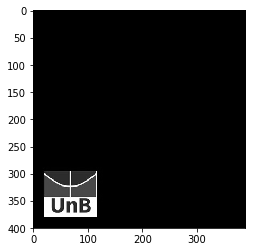

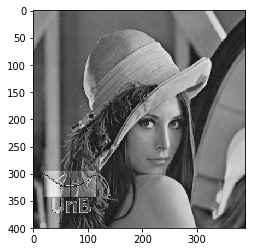

In [70]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('lena.jpg')
img2 = cv2.imread('logo_unb.jpg')

#fazendo as conversões de cores
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

C = img+img2

plt.gray()
plt.imshow(img)
plt.show()
plt.imshow(img2)
plt.show()
plt.imshow(C)